# Linear Regression Analysis - Actual vs Predicted observations

> About Project -  With the help of this car's data set, I want to know the relationship between the foremost specifications of the vehicle itself. we know Engine cc, BHP, and Torque 
are more influencing the mileage factor individually. we cannot estimate the mileage figure with engine cc or other specifications(simple regression). however, if we consider the main specifications of the vehicle as an independent variable and mileage as a dependent variable. by doing this analysis, we will be able to estimate the mileage figures


## Import DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Reading DataSet and Data Preprocessing 

In [2]:
df = pd.read_csv("C:\\Users\\Manikanta\\Downloads\\Car details v3.csv")

In [3]:
df = df[['name','mileage','engine','max_power','torque']] ## choosing columns which are required for analysis.

In [4]:
df.head() #here name column no need to keep however, at data cleansing part it would be helpfull for cross checking.

,name,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [5]:
df.info() #rows are 8128 and we can see here data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       8128 non-null   object
 1   mileage    7907 non-null   object
 2   engine     7907 non-null   object
 3   max_power  7913 non-null   object
 4   torque     7906 non-null   object
dtypes: object(5)
memory usage: 317.6+ KB


In [6]:
df.isna().sum() #no.of null values per column

name           0
mileage      221
engine       221
max_power    215
torque       222
dtype: int64

In [7]:
#Note - removing the rows if "all columns" don't have values...

df.dropna(axis='index',how='all',subset=['mileage','engine','max_power','torque'],inplace=True) 


In [8]:
df.isnull().sum()

name         0
mileage      6
engine       6
max_power    0
torque       7
dtype: int64

In [9]:
df.duplicated().sum() # no.of duplicated values does dataset have

5802

In [10]:
#note - removing all unnessasary repeated values and and i will remove duplicate again later after remove the name name.

df.drop_duplicates(ignore_index=True,inplace=True)

In [11]:
#ignore this column go forward... you will understand why did i code, later...

df['torque'].replace({'380Nm(38.7kgm)@ 2500rpm':'380Nm@ 1750-2500rpm'},inplace=True)

#________________________________________________________________________________
df.torque.replace({'190@ 21,800(kgm@ rpm)':'223Nm@'},inplace=True)

df.torque.replace({'145@ 4,100(kgm@ rpm)':'145Nm@'},inplace=True)

df.torque.replace({'110@ 3,000(kgm@ rpm)':'110Nm@'},inplace=True)

df.torque.replace({'130@ 2500(kgm@ rpm)':'130Nm@'},inplace=True)

df.torque.replace({'115@ 2,500(kgm@ rpm)':'115Nm@'},inplace=True)

df.torque.replace({'115@ 2500(kgm@ rpm)':'115Nm@'},inplace=True)
#_______________________________________________________________________________

df.torque.replace({'14.9 KGM at 3000 RPM':'14.9kgm'},inplace=True)

df.torque.replace({'24 KGM at 1900-2750 RPM':'24kgm'},inplace=True)


In [12]:
#Note - 1. observations with string values are there so step-1 is seperate it and remove str values.
#Note - 2.then convert it into float type from object


df['mileage']  = df['mileage'].str.split().str.get(0).astype(float) 

In [13]:
#Note - 1. observations with string values are there so step-1 is seperate it and remove str values.
#Note - 2.then convert it into float type from object


df['engine']  = df['engine'].str.split().str.get(0).astype(float)

In [14]:
#Note - 1. observations with string values are there so step-1 is seperate it and remove str values.

df['max_power'] =df['max_power'].str.split().str.get(0)

In [15]:
#here i have found a data entry mistake

df[df['max_power']=='bhp']

,name,mileage,engine,max_power,torque
1657,Maruti Omni CNG,10.9,796.0,bhp,NaN


In [16]:
#step-1 replace with nan values then....

df.max_power.replace('bhp',np.nan,inplace=True)

In [17]:
#step-2  converting into float type

df['max_power'] = df['max_power'].astype(float)

In [18]:
#here we can see how torque observations along with str and special characters.

df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '

In [19]:
#note  1-remoing all str values with observations along with @special character 
#note  2.converting into float type



df['Torque']=df.torque.str.split().str.get(0).str.split('Nm').str.get(0).str.split('Kgm').str.get(0).str.split('kgm').str.get(0).str.split('nm').str.get(0).str.split('NM').str.get(0).str.replace('[\@\,]','').replace({'110(11.2)':'110'}).astype(float)

In [20]:
df.info() #now it is fine however....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       2111 non-null   object 
 1   mileage    2108 non-null   float64
 2   engine     2108 non-null   float64
 3   max_power  2110 non-null   float64
 4   torque     2107 non-null   object 
 5   Torque     2107 non-null   float64
dtypes: float64(4), object(2)
memory usage: 99.1+ KB


# ___

#### here in the torque column there are two types of torque figures are there -

1. Nm unit values
2. Kg-m unit values

### Nm = kgm * 9.8067  for more see the below image



#### Therefore , we need to convert the values kgm to nm..


In [21]:
from urllib.request import urlretrieve

urlretrieve('https://th.bing.com/th/id/R.4c321b88fc80b86880bb8662881c13fa?rik=FywKvPuufxs3wA&riu=http%3a%2f%2fwww.unipulse.tokyo%2fen%2fwp-content%2fuploads%2f2018%2f02%2fNm_kgm.gif&ehk=%2bC4wG%2fZtU57DZDu3cqH4XHsclceIyvMOZw564ayZUi4%3d&risl=&pid=ImgRaw&r=0','details.jpg')

('details.jpg', <http.client.HTTPMessage at 0x201139097f0>)

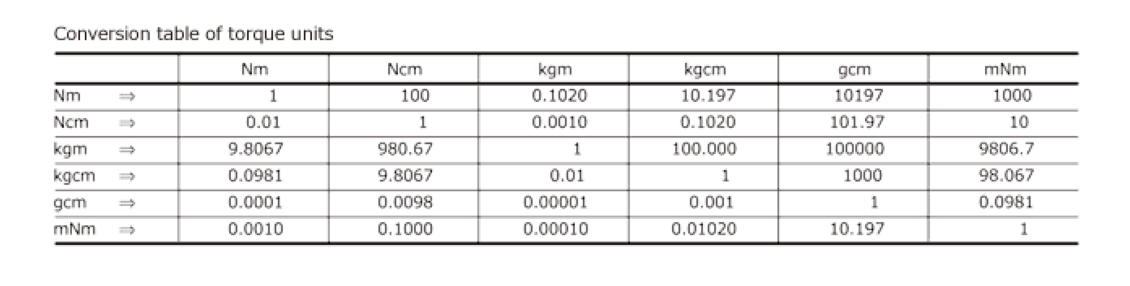

In [22]:
from PIL import Image

torque_det = Image.open('details.jpg')

plt.figure(figsize=(20,10))

plt.grid(False)
plt.axis(False)

plt.imshow(torque_det);

In [23]:
#  step -1   firsly we have torque named columns are 2 in our data. we should use unmodified column that is "torque"
#            here i will seperate the column, nm and kgm like false and True Boolean type. but first we should know that 
#            kgm string in capital and small letters formate and some data entry mistakes (that is they were mistakenly type kgm
#            instead of nm)  so can check my notework at "In[11]".

add = pd.DataFrame({'bool':df['torque'].str.contains('kgm')})  

In [24]:
df = pd.concat((df,add),axis=1)

#step -2   concate it. next you can understand. it will be appearing..torque column with nm observation indicating 'False' and
#          torque column with kgm indicating true..


df.head()

,name,mileage,engine,max_power,torque,Torque,bool
0,Maruti Swift Dzire VDI,23.40,1248.0,74.00,190Nm@ 2000rpm,190.0,False
1,Skoda Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,250.0,False
2,Honda City 2017-2020 EXi,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",12.7,True
3,Hyundai i20 Sportz Diesel,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,22.4,True
4,Maruti Swift VXI BSIII,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",11.5,True


In [25]:
#then divide it..into two types true and false and after calculation we will concate it both.

a = df[df['bool']==True]

In [26]:
b = df[df['bool']==False]

In [27]:
#create a column.it should have kgm to nm values

a['n_Torque'] = a.Torque* 9.80665

In [28]:
#then select required columns

a1 = a[['name','mileage','engine','max_power','n_Torque']]

In [29]:
#here we will concate them again so keeping columns are same as a1 part

b1 = b.drop(columns=['torque','bool'],axis=True).rename({'Torque':'n_Torque'},axis=1)

In [30]:
car_df =pd.concat((a1,b1),axis=0,ignore_index=True)

In [31]:
car_df.reset_index(inplace=True)

In [32]:
#droping unnesscary columns secound time

car_df.drop(columns=['name','index'],inplace=True)

In [33]:
#In this analysis we require only figures. so that i had to remove duplicates again

car_df[['mileage','engine','max_power','n_Torque']].drop_duplicates(inplace=True)

In [34]:
#with the help of describe() function we can see stats values and have you observe the min of mileage ?


car_df.describe()

,mileage,engine,max_power,n_Torque
count,2107.000000,2107.000000,2107.000000,2107.000000
mean,18.622572,1536.933555,96.236602,186.430182
std,4.331747,511.509219,37.025182,93.697427
min,0.000000,624.000000,32.800000,47.071920
25%,15.550000,1197.000000,71.000000,113.750000
50%,18.500000,1399.000000,88.200000,173.000000
75%,21.500000,1797.500000,108.600000,220.000000
max,42.000000,3604.000000,400.000000,789.000000


In [35]:
#data entry mistake so that i am replacing the value 0 to nan

car_df.mileage.replace(0,np.nan,inplace=True)

In [36]:
car_df.isnull().sum()

mileage      9
engine       0
max_power    0
n_Torque     0
dtype: int64

In [37]:
#     here why i am fill the null values with help of engine..
#     we can remove the nullvales only if all columns are null but here only mileage column is null. 
#     i dont take mean or median of mileage observations. Instead of that take a base and find them,
#      which is better to get meaning full values.... because mileage observations are not for only one cc engine..

car_df.mileage = car_df.groupby('engine')['mileage'].apply(lambda x:x.fillna(x.median()))

In [38]:
car_df.isnull().sum()

mileage      1
engine       0
max_power    0
n_Torque     0
dtype: int64

In [39]:
car_df.dropna(inplace=True)

## Skewness and Outliers

engine
skewness : 1.04



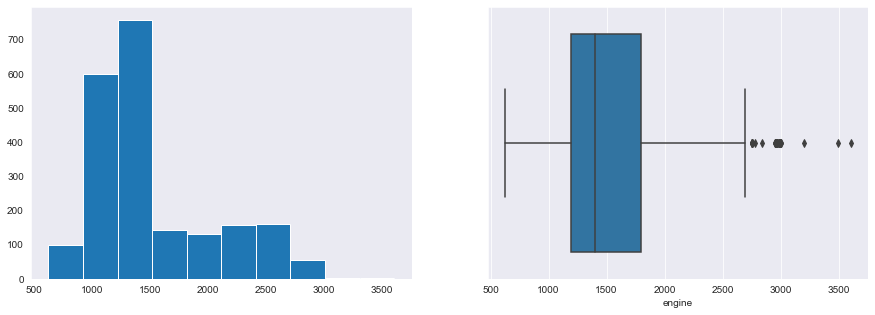

max_power
skewness : 1.72



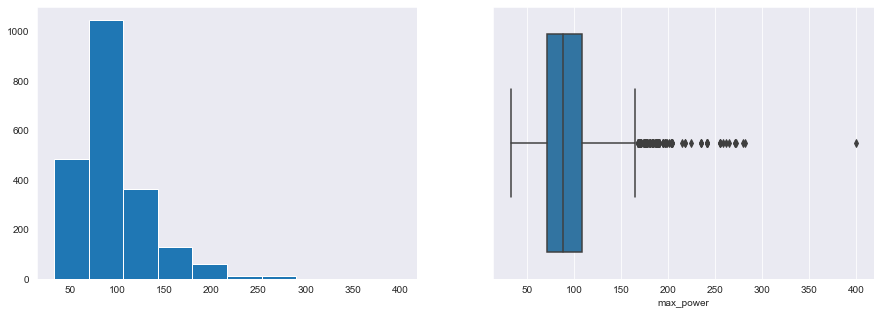

n_Torque
skewness : 1.43



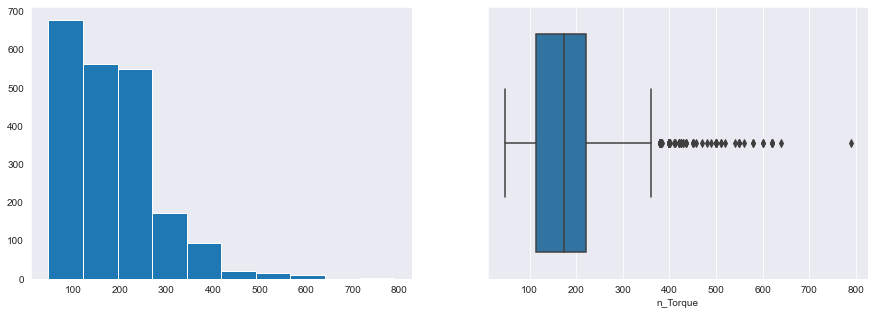

mileage
skewness : 0.34



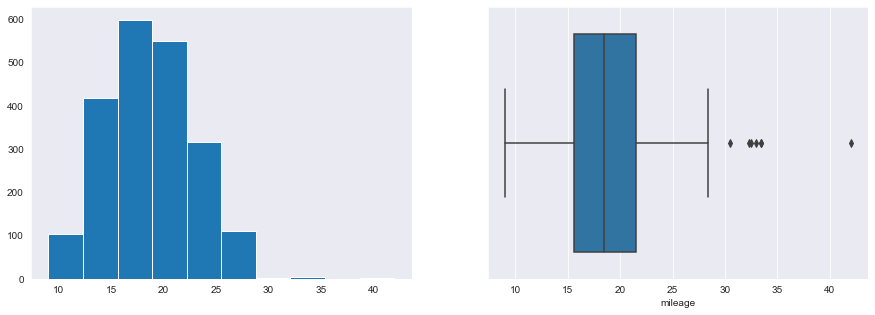

In [40]:
for i in ['engine','max_power','n_Torque','mileage']:
    print(i)
    print('skewness : {:.2f}'.format(car_df[i].skew()))
    print( )
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    car_df[i].hist(grid=False)
    plt.subplot(1,2,2)
    sns.boxplot(x=car_df[i])
    plt.show()

## Multivariate Analysis

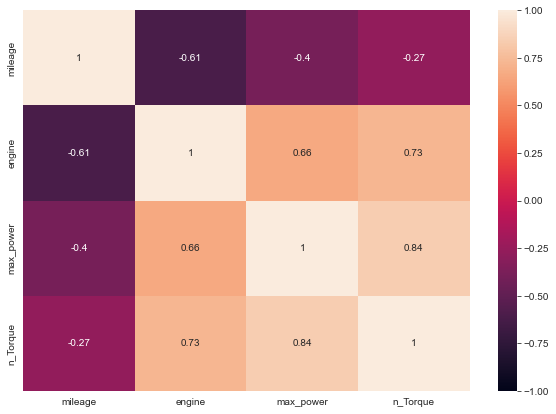

In [41]:
plt.figure(figsize=(10,7))

sns.heatmap(car_df.corr(),vmax=1,vmin=-1,annot=True);

#here you can see mileage with every other specifications, a negetive corelation coffiecient.

## Observations :

1. Here we can see the engine (independent variable) and how it is influencing the mileage (dependent variable) r = -0.61 compare to remain independent variables of torque and max power.

2. after the engine variable next max power variable is influencing the mileage r= -0.4

3. Along with this, we can see a strong relationship between the engine and torque similarly torque and max power r =0.84

#### with the help heatmap we could get the "R value" 

#### lets see regression direction in pair plots

#  ____

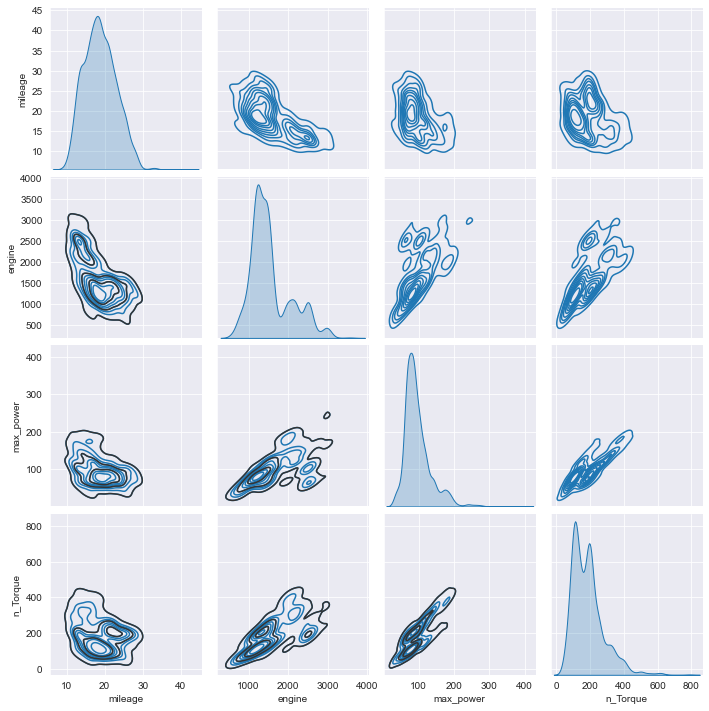

In [42]:
#wait it will take few more seconds for loading...

sct = sns.pairplot(car_df,kind='kde')

sct.map_lower(sns.kdeplot,levels=4,color='.2');

## Linear Regression Model

### Define x and y

In [43]:
x_var = car_df.drop(columns=['mileage'],axis=1).values

y_var = car_df.mileage.values

### Spliting the data set into the training set and test set

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_var,y_var,test_size=0.20,random_state=0)

### Train the model on the Training set

In [45]:
ml = LinearRegression()

ml.fit(x_train,y_train)

LinearRegression()

### Predict the test set results

In [46]:
y_pred = ml.predict(x_test)

### Evalute the Model

In [47]:
coff_of_det = r2_score(y_test,y_pred)


print('The coffiecient of Determination is {:.2f}'.format(coff_of_det))
print( )
print('The mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print( )
print('the mean absolute percentage error is {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

The coffiecient of Determination is 0.47

The mean squared error is 2.91

the mean absolute percentage error is 0.12


### Plot the results

In [48]:
new_df = pd.DataFrame({'actual_y':y_test,'predicted_y':y_pred,'residuals':y_test-y_pred})

the correlation coffiecient r value is 0.69


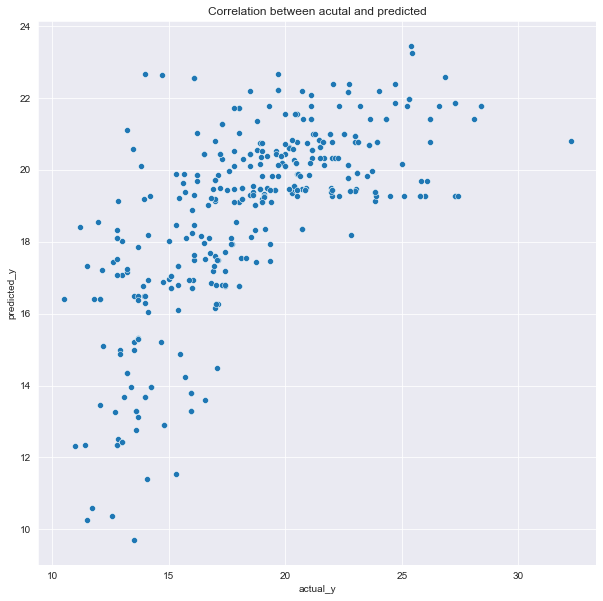

In [49]:
plt.figure(figsize=(10,10))
plt.title('Correlation between acutal and predicted')

sns.scatterplot(x=new_df.actual_y,y=new_df.predicted_y,palette='deep')

print('the correlation coffiecient r value is {:.2f}'.format(new_df.actual_y.corr(new_df.predicted_y)))

### Residual density plot

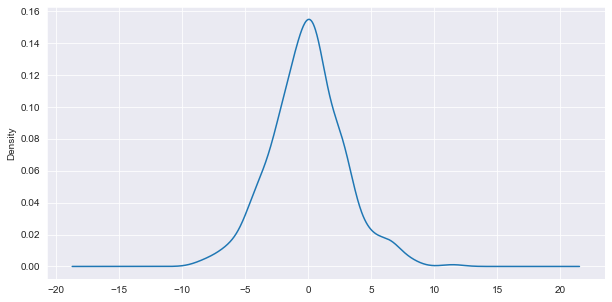

In [50]:
plt.figure(figsize=(10,5))

new_df.residuals.plot(kind='kde');

### Observations -

#### here we can see the residual density plot how normally distributed it is. However, this data has outliers and skewed distribution. we could see above. so that our residual plot below the left and right lines went to till (-20,20).